1\. **PCA on 3D dataset**

* Generate a dataset simulating 3 features, each with N entries (N being ${\cal O}(1000)$). Each feature is made by random numbers generated according the normal distribution $N(\mu,\sigma)$ with mean $\mu_i$ and standard deviation $\sigma_i$, with $i=1, 2, 3$. Generate the 3 variables $x_{i}$ such that:
    * $x_1$ is distributed as $N(0,1)$
    * $x_2$ is distributed as $x_1+N(0,3)$
    * $x_3$ is given by $2x_1+x_2$
* Find the eigenvectors and eigenvalues using the eigendecomposition of the covariance matrix
* Find the eigenvectors and eigenvalues using the SVD. Check that the two procedures yield to same result
* What percent of the total dataset's variability is explained by the principal components? Given how the dataset was constructed, do these make sense? Reduce the dimensionality of the system so that at least 99% of the total variability is retained
* Redefine the data according to the new basis from the PCA
* Plot the data, in both the original and the new basis. The figure should have 2 rows (the original and the new basis) and 3 columns (the $[x_0, x_1]$, $[x_0, x_2]$ and $[x_1, x_2]$ projections) of scatter plots.

In [2]:
import numpy as np
from numpy import random as npr
from scipy import linalg as la
from matplotlib import pyplot as plt

#generate the variables
N = 1000
x_1 = npr.normal(0, 1, N)
x_2 = x_1 + npr.normal(0, 3, N)
x_3 = 2*x_1 + x_2

#create the dataset
M = np.array([x_1, x_2, x_3])
print("Generated dataset:\n", M)

Generated dataset:
 [[ 0.94036452 -1.55430326 -0.019861   ...  1.25015861  0.85055727
  -0.17837147]
 [ 4.14863298 -1.46638155  2.13692931 ...  4.66578043 -5.30489222
   2.0779288 ]
 [ 6.02936202 -4.57498806  2.09720731 ...  7.16609765 -3.60377768
   1.72118586]]


In [3]:
#eigenvectors and eigenvalues, using covariance matrix decomposition

#calculate the covariance matrix
cov = np.cov(M)
print("Covariance matrix:\n", cov, '\n')

# now find the eigenvectors and eigenvalues of the covariance matrix
l, V = la.eig(cov)
l = np.real_if_close(l)

print("Eigenvalues:\n", l, '\n')
print("Eigenvectors:\n", V, '\n')

Covariance matrix:
 [[ 0.93025367  1.08086088  2.94136822]
 [ 1.08086088  9.75667921 11.91840098]
 [ 2.94136822 11.91840098 17.80113741]] 

Eigenvalues:
 [2.67117927e+01 7.69999036e-16 1.77627757e+00] 

Eigenvectors:
 [[-0.11645354 -0.81649658  0.56548378]
 [-0.57611983 -0.40824829 -0.70810965]
 [-0.8090269   0.40824829  0.42285791]] 



In [4]:
#eigenvectors and eigenvalues using the SVD

#apply SVD decomposition
U, S, Vt = np.linalg.svd(M)

#get the eigenvalues and eigenvectors
l_svd = S**2/(N-1)
V_svd = U

print("Eigenvalues (with SVD):\n", l_svd, '\n')
print("Eigenvectors (with SVD):\n", V_svd, '\n')

#compare the two:
print("Did the two methods give the same eigenvalues?", np.allclose(l, l_svd))
print("Did the two methods give the same eigenvectors?", np.allclose(V, V_svd)) 
print("...But looking at the results one can see that two columns are relatively switched and one eigenvalue is compatible with 0 --> acceptable result")

Eigenvalues (with SVD):
 [2.67329434e+01 1.77679267e+00 9.87385881e-32] 

Eigenvectors (with SVD):
 [[-0.11652836  0.56546837 -0.81649658]
 [-0.57602613 -0.70818588 -0.40824829]
 [-0.80908284  0.42275086  0.40824829]] 

Did the two methods give the same eigenvalues? False
Did the two methods give the same eigenvectors? False
...But looking at the results one can see that two columns are relatively switched and one eigenvalue is compatible with 0 --> acceptable result


In [5]:
#What percent of the total dataset's variability is explained by the principal components? Given how the dataset was constructed, do these make sense? 
#Reduce the dimensionality of the system so that at least 99% of the total variability is retained

#diagonalize the covariance matrix
Lambda = np.diag(l)
print("Diagonalized covariance matrix\n", Lambda, "\n")
print("By taking the principal components (the directions with the largest eigenvalues in module) we explain", (Lambda[0, 0]+Lambda[2, 2])/Lambda.trace(), "of the total variability\n")
print("This result is not surprising since one of the three variables, x_3, is a linear combination of the other two.\n Given this result we can reorder the basis vectors and keep only the first two principal components, still considering all the variability")


Diagonalized covariance matrix
 [[2.67117927e+01 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 7.69999036e-16 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 1.77627757e+00]] 

By taking the principal components (the directions with the largest eigenvalues in module) we explain 1.0 of the total variability

This result is not surprising since one of the three variables, x_3, is a linear combination of the other two.
 Given this result we can reorder the basis vectors and keep only the first two principal components, still considering all the variability


Text(0, 0.5, 'x_1')

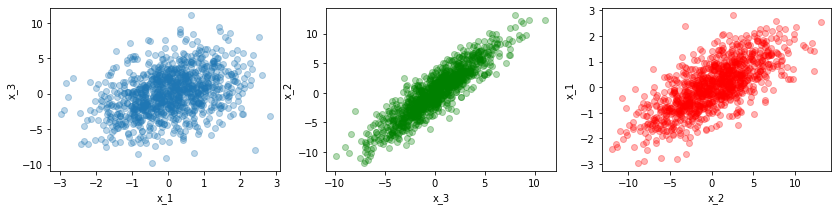

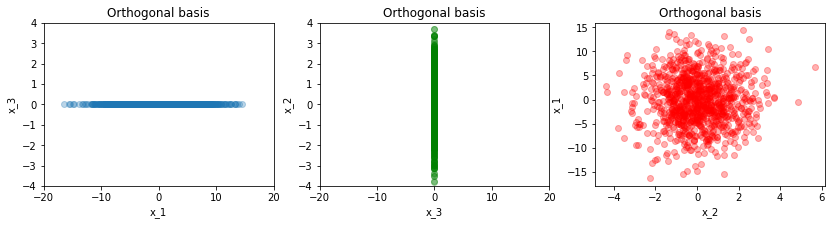

In [6]:
#rotate the data in the othogonal basis
M_diag = np.dot(V.T, M)

fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(14, 3))

ax1.scatter(M[0,:], M[1,:], alpha=0.3)
ax1.set_xlabel("x_1")
ax1.set_ylabel("x_3")


ax2.scatter(M[1,:], M[2,:],alpha=0.3, c = 'g')
ax2.set_xlabel("x_3")
ax2.set_ylabel("x_2")

ax3.scatter(M[2,:], M[0,:],alpha=0.3, c = 'r')
ax3.set_xlabel("x_2")
ax3.set_ylabel("x_1")

fig, (bx1, bx2, bx3) = plt.subplots(nrows=1, ncols=3, figsize=(14, 3))
bx1.set_title("Orthogonal basis")
bx1.scatter(M_diag[0,:], M_diag[1,:], alpha=0.3,)
bx1.axis([-20,20,-4,4])
bx1.set_xlabel("x_1")
bx1.set_ylabel("x_3")

bx2.set_title("Orthogonal basis")
bx2.scatter(M_diag[1,:], M_diag[2,:], alpha=0.3, c = 'g')
bx2.axis([-20,20,-4,4])
bx2.set_xlabel("x_3")
bx2.set_ylabel("x_2")

bx3.set_title("Orthogonal basis")
bx3.scatter(M_diag[2,:], M_diag[0,:], alpha=0.3, c= 'r')
bx3.set_xlabel("x_2")
bx3.set_ylabel("x_1")

2\. **PCA on a nD dataset**

* Start from the dataset you have genereted in the previous exercise and add uncorrelated random noise. Such noise should be represented by other 10 uncorrelated variables normally distributed, with a standard deviation much smaller (e.g. a factor 20) than those used to generate the $x_1$ and $x_2$. Repeat the PCA procedure and compare the results with what you have obtained before.

In [11]:
#generate the dataset
x_random = npr.normal(loc = 0, scale = 0.05, size = (10, 1000))
X = np.concatenate((M, x_random))

cov = np.cov(X)
l, V = la.eig(cov)
l = np.real_if_close(l)

Comparing this to the previous result we see that once we add this uncorrelated noise, it contains more vaiability than the x_3, wich was a linear combination, therefore the noise is a more important contribution to the data spread than the x_3 variable


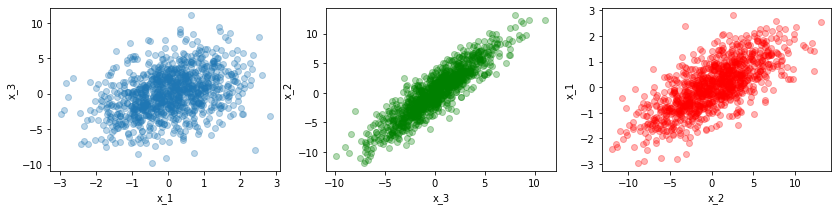

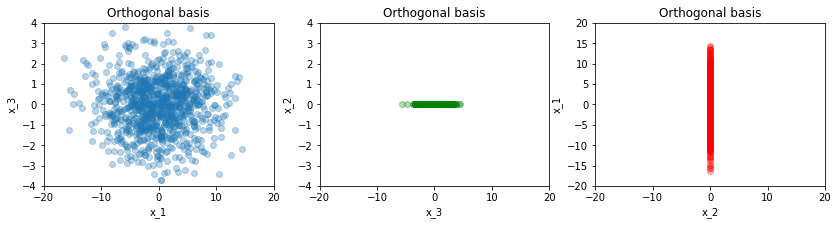

In [14]:
#rotate the data in the othogonal basis
X_diag = np.dot(V.T, X)

fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(14, 3))

ax1.scatter(X[0,:], X[1,:], alpha=0.3)
ax1.set_xlabel("x_1")
ax1.set_ylabel("x_3")


ax2.scatter(X[1,:], X[2,:],alpha=0.3, c = 'g')
ax2.set_xlabel("x_3")
ax2.set_ylabel("x_2")

ax3.scatter(X[2,:], X[0,:],alpha=0.3, c = 'r')
ax3.set_xlabel("x_2")
ax3.set_ylabel("x_1")

fig, (bx1, bx2, bx3) = plt.subplots(nrows=1, ncols=3, figsize=(14, 3))
bx1.set_title("Orthogonal basis")
bx1.scatter(X_diag[0,:], X_diag[1,:], alpha=0.3,)
bx1.axis([-20,20,-4,4])
bx1.set_xlabel("x_1")
bx1.set_ylabel("x_3")

bx2.set_title("Orthogonal basis")
bx2.scatter(X_diag[1,:], X_diag[2,:], alpha=0.3, c = 'g')
bx2.axis([-20,20,-4,4])
bx2.set_xlabel("x_3")
bx2.set_ylabel("x_2")

bx3.set_title("Orthogonal basis")
bx3.scatter(X_diag[2,:], X_diag[0,:], alpha=0.3, c= 'r')
bx3.axis([-20,20,-20,20])
bx3.set_xlabel("x_2")
bx3.set_ylabel("x_1")

print("Comparing this to the previous result we see that once we add this uncorrelated noise, it contains more vaiability than the x_3, wich was a linear combination, therefore the noise is a more important contribution to the data spread than the x_3 variable")

3\. **Optional**: **PCA on the MAGIC dataset**

Perform a PCA on the magic04.data dataset.

In [ ]:
# get the dataset and its description on the proper data directory
#!wget https://archive.ics.uci.edu/ml/machine-learning-databases/magic/magic04.data -P data/
#!wget https://archive.ics.uci.edu/ml/machine-learning-databases/magic/magic04.names -P data/ 